In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


The total of participants

In [11]:
df = pd.read_csv('./data/raw_data.csv')
len(df)

432

# Last page

In [12]:
last_page = df[df["lastpage. Last page"] != -1.0]["lastpage. Last page"]
last_page = last_page.fillna(value='Quit directly')
tab = pd.crosstab(index = last_page, columns="count")
tab


col_0,count
lastpage. Last page,
0,73
1,27
2,10
3,17
4,12
6,4
7,289


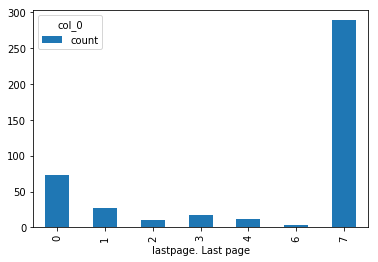

In [13]:
tab.plot(kind='bar')
plt.show()

# Country
The only reason of filtering is the participants that has a different country than Germany. It is not shown in the analysis because they are removed during the cleaning.

In [22]:
country = df.iloc[:, 7]

In [23]:
country_tab = pd.crosstab(index = country, columns="count")
country_tab

col_0,count
socio1. In which country do you work?,
Afghanistan,1
Australia,3
Austria,1
Belgium,1
Brazil,1
Czech Republic,1
France,5
Germany,29
Ireland,3


In [24]:
country_tab[country_tab.index != 'United Kingdom'].sum()

col_0
count    89
dtype: int64

In [26]:
len(df[(df.iloc[:,7] != 'United Kingdom') & (df["lastpage. Last page"] > 1.0)])


79

In [28]:
cleaneddf = pd.read_csv('./data/cleaned_data.csv')

In [29]:
len(cleaneddf)

253